In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.49 s)


## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

## Duration

In [9]:
sim.set_duration(1e7)

## Tissue growth

In [10]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [11]:
sim.enable_division(contraction=0)
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Dilution volumes

In [12]:
#sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [13]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 1.2, "view_size": 60, "view": (90, -90)})

# Visualization of the initial state

<IPython.core.display.Javascript object>


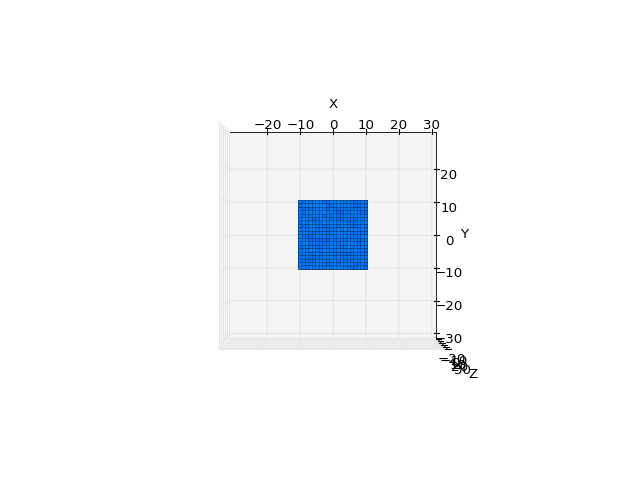

c_a: from 0.279984958195 to 0.310055134532
c_h: from 4.36774332292 to 4.43324905284


In [14]:
sim.renderer.display("c_a")

# Simulation

Growth step #0
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 11.1929690838 seconds
Growth of the tissue: 0.468188047409 seconds
Cell divisions: 0.670873165131 seconds


<IPython.core.display.Javascript object>


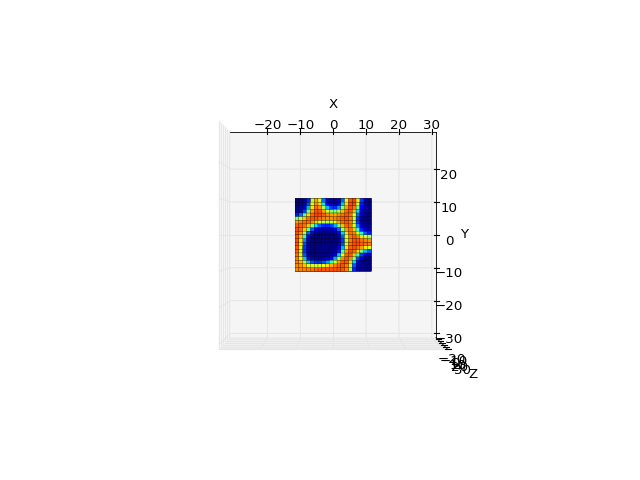

c_a: from 0.000226709201265 to 1.01192463493
c_h: from 3.24665961263 to 4.33626009068
Growth step #1
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 2.6842777729 seconds
Growth of the tissue: 0.513689994812 seconds
Cell divisions: 0.524425983429 seconds


<IPython.core.display.Javascript object>


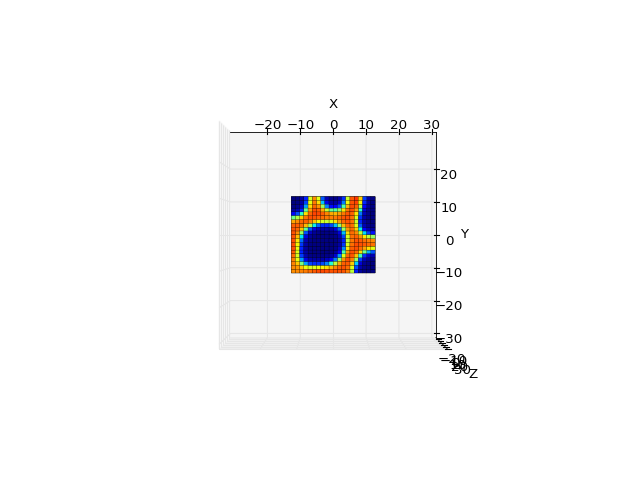

c_a: from 0.000157682640186 to 1.02616305496
c_h: from 2.77186808377 to 3.75768471643
Growth step #2
Jacobian computation: started
Jacobian computation: finished (0.03 s)
Integration of the ODE system: 5.07914686203 seconds
Growth of the tissue: 0.478399038315 seconds
Cell divisions: 0.548593997955 seconds


<IPython.core.display.Javascript object>


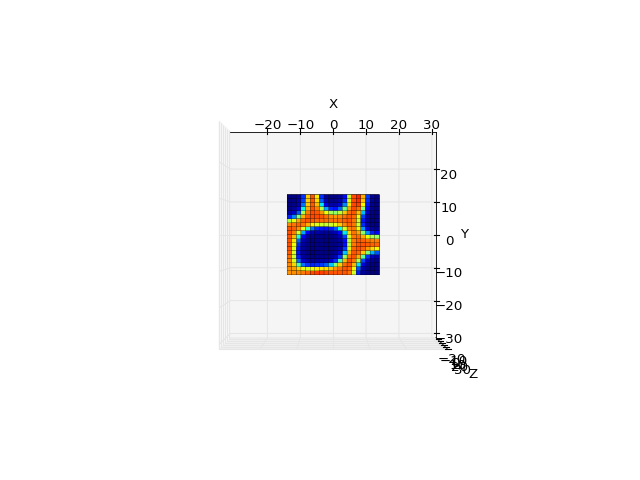

c_a: from 0.000215665855378 to 1.04358767587
c_h: from 2.39944231209 to 3.25381533315
Growth step #3
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 2.6829791069 seconds
Growth of the tissue: 0.47248506546 seconds
Cell divisions: 0.535642147064 seconds


<IPython.core.display.Javascript object>


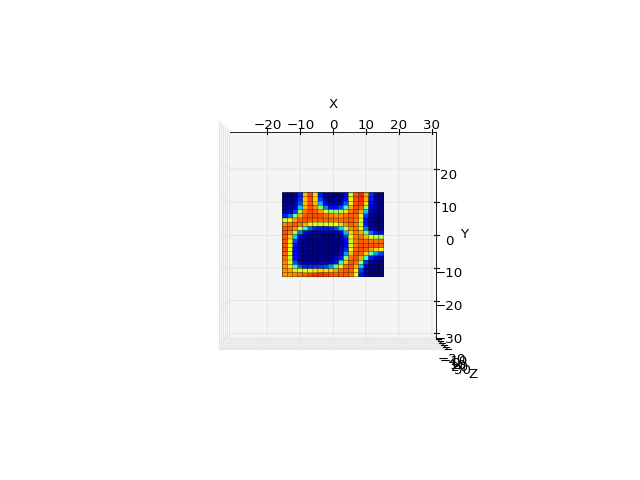

c_a: from 0.000150868679999 to 1.0445397845
c_h: from 2.0474045298 to 2.81918169305
Growth step #4
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 2.98168706894 seconds
Growth of the tissue: 0.529414176941 seconds
Cell divisions: 3.08027815819 seconds


<IPython.core.display.Javascript object>


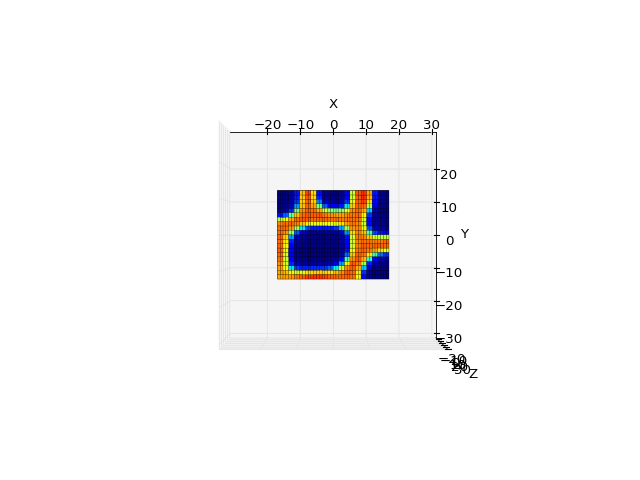

c_a: from 0.00010507151767 to 1.03479545131
c_h: from 1.70899545371 to 2.41834169045
Growth step #5
Jacobian computation: started
Jacobian computation: finished (0.07 s)
Integration of the ODE system: 26.0193691254 seconds
Growth of the tissue: 2.36298203468 seconds
Cell divisions: 3.09189677238 seconds


<IPython.core.display.Javascript object>


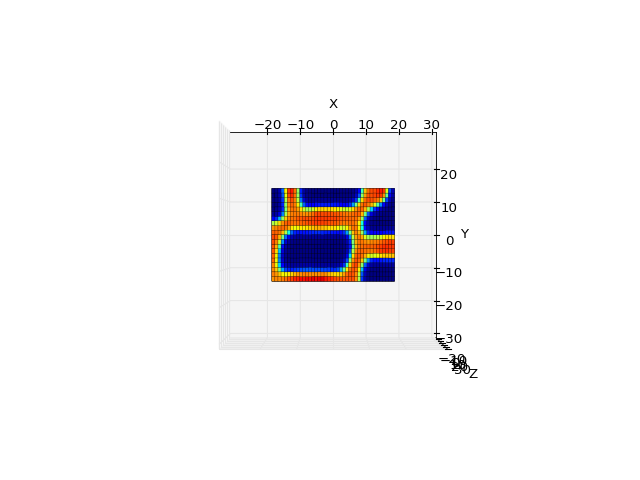

c_a: from 9.78651186882e-05 to 1.09304982496
c_h: from 2.77614599824 to 4.18009039661
Growth step #6
Jacobian computation: started
Jacobian computation: finished (0.10 s)
Integration of the ODE system: 16.772744894 seconds
Growth of the tissue: 2.34081196785 seconds
Cell divisions: 3.05662894249 seconds


<IPython.core.display.Javascript object>


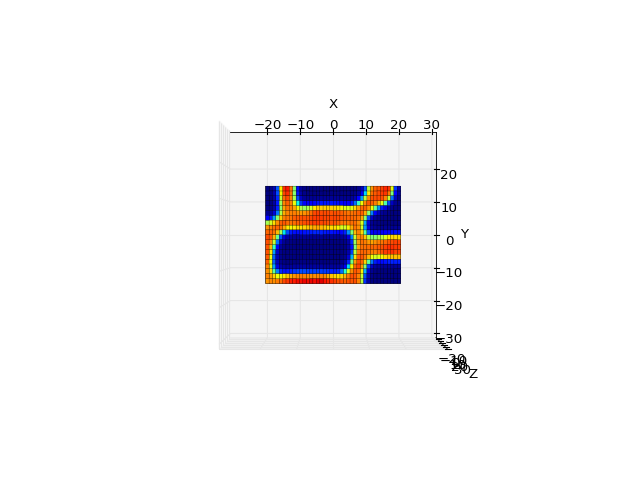

c_a: from 8.05314926021e-05 to 1.0927163524
c_h: from 2.37219203708 to 3.62090433322
Growth step #7
Jacobian computation: started
Jacobian computation: finished (0.10 s)
Integration of the ODE system: 15.3021230698 seconds
Growth of the tissue: 2.28507804871 seconds
Cell divisions: 3.08769202232 seconds


<IPython.core.display.Javascript object>


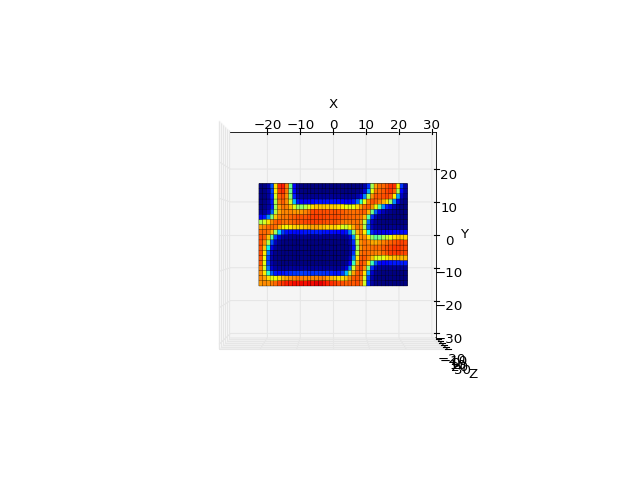

c_a: from 6.6189432751e-05 to 1.09138201614
c_h: from 2.02632929628 to 3.13710565108
Growth step #8
Jacobian computation: started
Jacobian computation: finished (0.10 s)
Integration of the ODE system: 20.8734478951 seconds
Growth of the tissue: 1.32639193535 seconds
Cell divisions: 1.67589592934 seconds


<IPython.core.display.Javascript object>


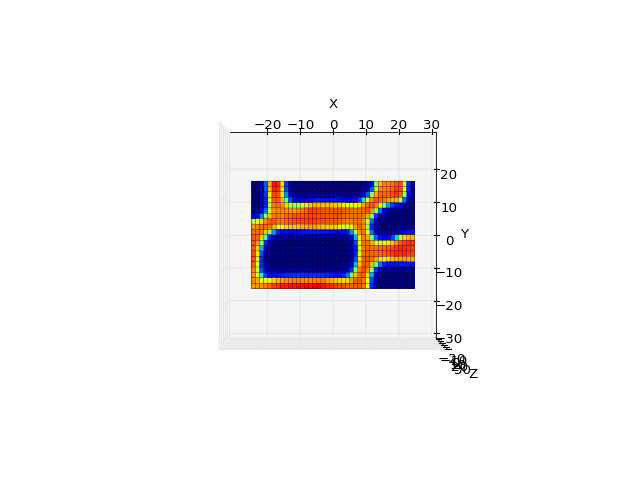

c_a: from 5.53049616241e-05 to 1.08883889802
c_h: from 1.73292961668 to 2.71799020297
Growth step #9
Jacobian computation: started
Jacobian computation: finished (0.06 s)
Integration of the ODE system: 10.9078400135 seconds
Growth of the tissue: 1.39729690552 seconds
Cell divisions: 7.7608230114 seconds


<IPython.core.display.Javascript object>


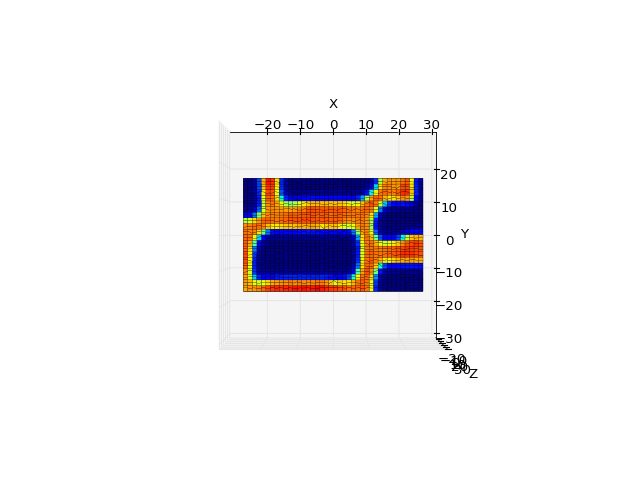

c_a: from 4.43232817199e-05 to 1.08006986905
c_h: from 1.45921579147 to 2.35978151541
Growth step #10
Jacobian computation: started
Jacobian computation: finished (0.15 s)
Integration of the ODE system: 114.121703863 seconds
Growth of the tissue: 2.83496403694 seconds
Cell divisions: 4.77558279037 seconds


<IPython.core.display.Javascript object>


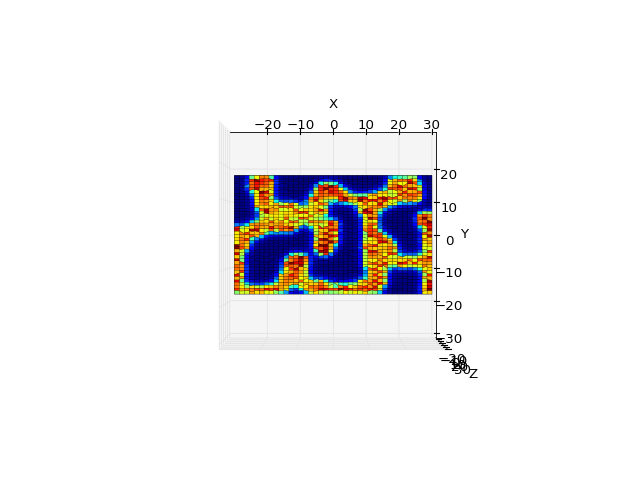

c_a: from 9.40627446474e-05 to 1.2557279979
c_h: from 2.79897573432 to 4.11591052714


In [15]:
sim.simulate()

We can see that as the tissue grows and the cells divide, new ridges of activator engulf into the valleys widened by growth.

Cell divisions do not directly trigger the reorganization of the pattern, because the spatial distribution of chemical species does not actually change (new cells have the same concentrations as former cells and occupy the same space). However, cell divisions modify how far the inhibitor can reach, relatively to the pattern previously achieved. Where it cannot reach, the activator starts being expressed. 